# Picnic Hackathon 🥇✅💯
 **When great customer support meets data**


## Why the challenge?
One of our core beliefs is to offer our customers the best support possible, by allowing them, for example, to send in pictures of defect products they wish to be reimbursed for. But processing these pictures is very time-consuming as it is all done manually.

## What is the challenge?
The challenge we propose is the following: As a first step in helping customer support, come up with a way of labeling every picture that comes in according to the product that is in the picture. To keep with the Picnic spirit, we encourage to be as innovative and creative with your solutions as possible.

## Dataset
To that end, we offer the following [dataset](https://github.com/Younes-Charfaoui/Picnic-Hackathon/blob/master/images/picnic_logo.png) of pictures of defect items.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras_preprocessing.image import ImageDataGenerator

path_to_folder = 'gdrive/My Drive/Dataset/The Picnic Hackathon 2019/'

In [0]:
df = pd.read_csv(path_to_folder + "train.tsv",  sep='\t')

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = datagen.flow_from_dataframe(dataframe=df, directory=path_to_folder + "train/", 
                                              x_col="file", y_col="label", 
                                              class_mode="categorical", 
                                              target_size=(224,224), 
                                              batch_size=7258)


Found 7258 images belonging to 25 classes.


In [0]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}

In [8]:
print(labels)

{0: 'Asparagus, string beans & brussels sprouts', 1: 'Bananas, apples & pears', 2: 'Bell peppers, zucchinis & eggplants', 3: 'Berries & cherries', 4: 'Broccoli, cauliflowers, carrots & radish', 5: 'Cheese', 6: 'Citrus fruits', 7: 'Cucumber, tomatoes & avocados', 8: 'Eggs', 9: 'Fish', 10: 'Fresh bread', 11: 'Fresh herbs', 12: 'Kiwis, grapes & mango', 13: 'Lunch & Deli Meats', 14: 'Milk', 15: 'Minced meat & meatballs', 16: 'Nectarines, peaches & apricots', 17: 'Onions, leek, garlic & beets', 18: 'Pineapples, melons & passion fruit', 19: 'Pork, beef & lamb', 20: 'Potatoes', 21: 'Poultry', 22: 'Pre-baked breads', 23: 'Pudding, yogurt & quark', 24: 'Salad & cress'}


In [9]:
X, y = train_generator.next()

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [13]:
y.shape

(7258, 25)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(X, y, shuffle = True, test_size = 0.3)

In [0]:
X_valid, y_valid = valid_generator.next()

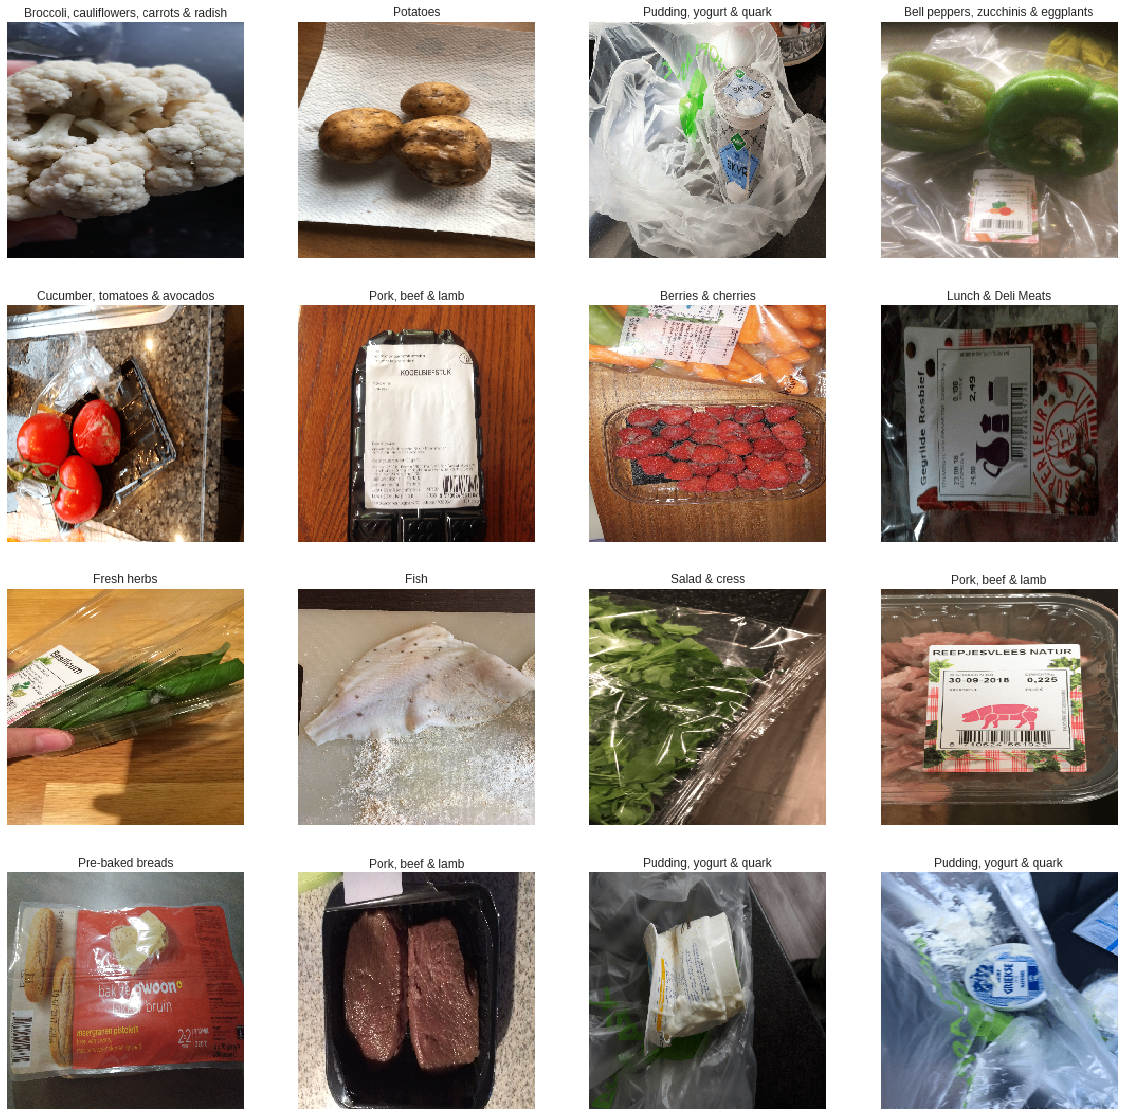

In [12]:
fig = plt.figure(figsize = (20,20))
for i in range(16):
  ax = fig.add_subplot(4,4, i+1, xticks = [], yticks = [])
  ax.imshow(x_train[i])
  ax.set_title(labels[np.argmax(y_train[i])])

In [14]:
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPooling2D, Activation, Dense, Flatten

Using TensorFlow backend.


In [17]:
# Building simple model
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
activation_6 (Activation)    (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
activation_7 (Activation)    (None, 112, 112, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 64)        18496     
__________

In [0]:
model.compile(optimizer = 'rmsprop', loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(x_train, y_train, epochs=100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5080/5080 [==============================] - 21s 4ms/step - loss: 3.0562 - acc: 0.1545
Epoch 2/100
5080/5080 [==============================] - 15s 3ms/step - loss: 2.5673 - acc: 0.2565
Epoch 3/100
5080/5080 [==============================] - 15s 3ms/step - loss: 2.2203 - acc: 0.3502
Epoch 4/100
5080/5080 [==============================] - 15s 3ms/step - loss: 1.7443 - acc: 0.4841
Epoch 5/100
5080/5080 [==============================] - 15s 3ms/step - loss: 1.2104 - acc: 0.6411
Epoch 6/100
5080/5080 [==============================] - 15s 3ms/step - loss: 0.8027 - acc: 0.7594
Epoch 7/100
5080/5080 [==============================] - 15s 3ms/step - loss: 0.5425 - acc: 0.8392
Epoch 8/100
5080/5080 [==============================] - 15s 3ms/step - loss: 0.3634 - acc: 0.8929
Epoch 9/100
5080/5080 [==============================] - 15s 3ms/step - loss: 0.2815 - acc: 0.9177
Epoch 10/100
5080/5080 [==============================] - 15s

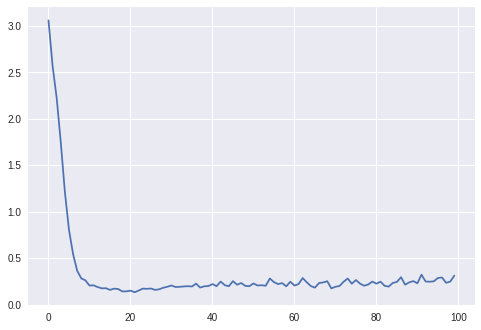

In [20]:
plt.plot(history.history['loss'])
plt.show()

In [21]:
score = model.evaluate(x_test, y_test)
print('Accuracy of {}%'.format(score[1]*100))

2178/2178 [==============================] - 3s 1ms/step
Accuracy of 24.104683195592287%


In [0]:
# Building some complex models
model = Sequential()
model.add(Conv2D(16, kernel_size = (1,1), padding= 'same', input_shape = (32,32,3), activation = 'relu'))
model.add(Conv2D(16, kernel_size = (1,1), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 1))
model.add(Conv2D(32, kernel_size = (2,2), padding= 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (2,2), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'softmax'))
model.summary()

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [0]:
history = model.fit([img_train], [lbl_train], epochs=100, batch_size = 32)

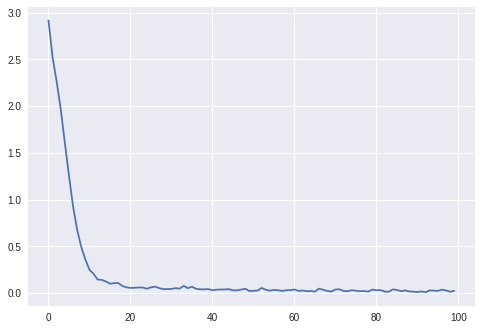

In [0]:
plt.plot(history.history['loss'])
plt.show()

In [0]:
score = model.evaluate([img_test] , [lbl_test])
print('Accuracy of {}%'.format(score[1]*100))

1517/1517 [==============================] - 0s 103us/step
Accuracy of 22.940013188827013%


In [0]:
from keras.applications.resnet50 import ResNet50
model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet', pooling='avg'))

In [0]:
model.add(Dense(25, activation = 'softmax'))

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_11 (Dense)             (None, 25)                51225     
Total params: 23,638,937
Trainable params: 23,585,817
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [60]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 32)

Epoch 1/10
5080/5080 [==============================] - 180s 35ms/step - loss: 2.2706 - acc: 0.3652
Epoch 2/10
5080/5080 [==============================] - 145s 29ms/step - loss: 1.5002 - acc: 0.5594
Epoch 3/10
5080/5080 [==============================] - 145s 29ms/step - loss: 1.0759 - acc: 0.6778
Epoch 4/10
5080/5080 [==============================] - 145s 29ms/step - loss: 0.7769 - acc: 0.7555
Epoch 5/10
5080/5080 [==============================] - 145s 29ms/step - loss: 0.5377 - acc: 0.8366
Epoch 6/10
5080/5080 [==============================] - 145s 29ms/step - loss: 0.3358 - acc: 0.9012
Epoch 7/10
5080/5080 [==============================] - 145s 29ms/step - loss: 0.2298 - acc: 0.9325
Epoch 8/10
5080/5080 [==============================] - 145s 29ms/step - loss: 0.2140 - acc: 0.9407
Epoch 9/10
5080/5080 [==============================] - 145s 29ms/step - loss: 0.1969 - acc: 0.9425
Epoch 10/10
5080/5080 [==============================] - 145s 29ms/step - loss: 0.1304 - acc: 0.9638

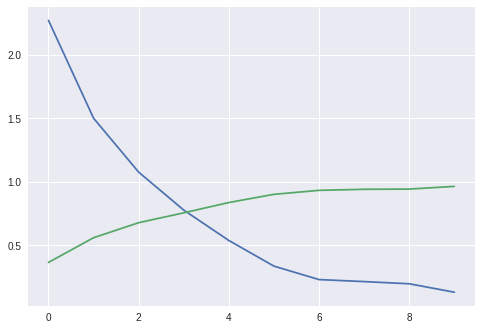

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

In [62]:
score = model.evaluate(x_test , y_test)
print('Accuracy of RESNET {}%'.format(score[1]*100))

2178/2178 [==============================] - 29s 13ms/step
Accuracy of RESNET 47.42883379247015%


In [63]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
